In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from ml.utils import load_application_classification_cnn_model, load_traffic_classification_cnn_model, normalise_cm
from ml.metrics import confusion_matrix, get_classification_report
from utils import ID_TO_APP, ID_TO_TRAFFIC

In [2]:
def plot_confusion_matrix(cm, labels):
    normalised_cm = normalise_cm(cm)
    
    fig, ax = plt.subplots(figsize=(12, 12))
    sns.heatmap(
        data=normalised_cm, cmap='YlGnBu',
        xticklabels=labels, yticklabels=labels,
        annot=True, ax=ax, fmt='.4f'
    )
    ax.set_xlabel('Predict labels')
    ax.set_ylabel('True labels')
    fig.show()

## Application Classification Model

Resolving data files:   0%|          | 0/200 [00:00<?, ?it/s]

Found cached dataset parquet (C:/Users/Afif/Desktop/PythonScripts/GitHubs/Deep-Packet-master/huggingface/parquet/test.parquet-da315d05bfec5652/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7)


  0%|          | 0/1 [00:00<?, ?it/s]

App model


C:\Users\Afif\AppData\Local\Temp\ipykernel_21272\4146530919.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


       label  precision    recall  true positive  false positive  \
0       CSGO   0.994076  0.991045        56886.0           339.0   
1    Discord   0.993068  0.992138       113454.0           792.0   
2      Email   0.860163  0.998841        13791.0          2242.0   
3       FTPS   0.999889  0.997953       813351.0            90.0   
4    Netflix   0.998103  0.996940       224160.0           426.0   
5       SFTP   0.999752  0.997903       137031.0            34.0   
6    Spotify   0.998064  0.993563       124258.0           241.0   
7      Teams   0.997784  0.995976       176986.0           393.0   
8   Valorant   0.992812  0.995691       106762.0           773.0   
9      Vimeo   0.914491  0.995283         9283.0           868.0   
10   Youtube   0.995271  0.993926        72813.0           346.0   

    true negative  false negative  
0       1797580.0           514.0  
1       1740174.0           899.0  
2       1839270.0            16.0  
3       1040210.0          1668.0  
4  

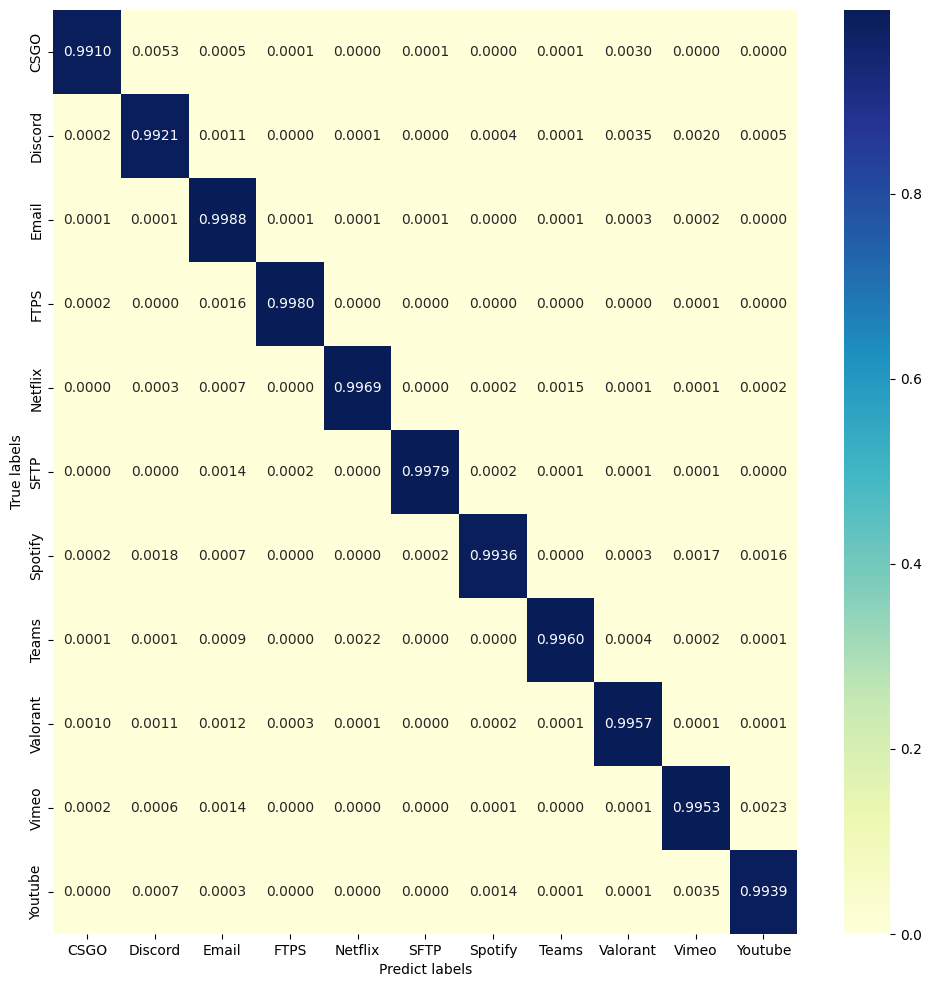

In [3]:
if __name__ == '__main__':
    
    # model path
    application_classification_cnn_model_path = 'model/undersampled_app.cnn.model'

    # test data path
    application_classification_test_data_path = r'D:\train_test_undersampled\application_classification\test.parquet'

    # change gpu to False if not using CUDA-based GPU
    application_classification_cnn = load_application_classification_cnn_model(
        application_classification_cnn_model_path, 
        gpu=True)
    
    app_cnn_cm = confusion_matrix(
        data_path=application_classification_test_data_path,
        model=application_classification_cnn,
        num_class=len(ID_TO_APP)
    )
    app_labels = []
    for i in sorted(list(ID_TO_APP.keys())):
        app_labels.append(ID_TO_APP[i])

    print("App model")
    plot_confusion_matrix(app_cnn_cm, app_labels)
    print(get_classification_report(app_cnn_cm, app_labels))
    get_classification_report(app_cnn_cm, app_labels).to_csv('undersampled_app_results.csv', index=False)

## Traffic Classification Model

Resolving data files:   0%|          | 0/200 [00:00<?, ?it/s]

Found cached dataset parquet (C:/Users/Afif/Desktop/PythonScripts/GitHubs/Deep-Packet-master/huggingface/parquet/test.parquet-0ab4f6bc2a564dc8/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7)


  0%|          | 0/1 [00:00<?, ?it/s]

Traffic model


C:\Users\Afif\AppData\Local\Temp\ipykernel_21272\4146530919.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


           label  precision    recall  true positive  false positive  \
0           Chat   0.226076  0.992897         2516.0          8613.0   
1          Email   0.900793  0.987108        13629.0          1501.0   
2  File Transfer   0.998625  0.996535      1081471.0          1489.0   
3      Streaming   0.998649  0.987935       427208.0           578.0   
4           Voip   0.998062  0.992760       155493.0           302.0   
5         Gaming   0.992782  0.979665       161346.0          1173.0   

   true negative  false negative  
0      1844172.0            18.0  
1      1840011.0           178.0  
2       768599.0          3760.0  
3      1422316.0          5217.0  
4      1698390.0          1134.0  
5      1689451.0          3349.0  


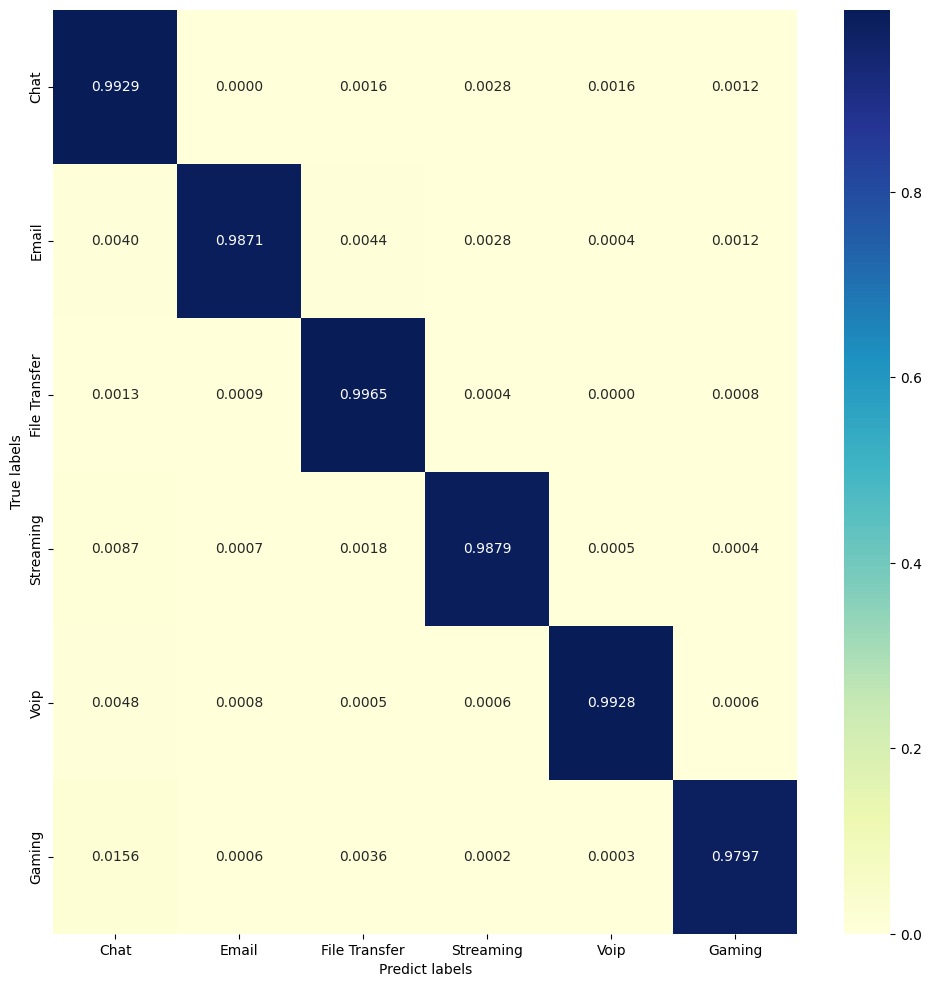

In [4]:
    # model path
    traffic_classification_cnn_model_path = 'model/undersampled_traffic.cnn.model'
    
    # test data path
    traffic_classification_test_data_path = r'D:\train_test_undersampled\traffic_classification\test.parquet'
    
    # change gpu to False if not using CUDA-based GPU
    traffic_classification_cnn = load_traffic_classification_cnn_model(
        traffic_classification_cnn_model_path, 
        gpu=True)
    
    traffic_cnn_cm = confusion_matrix(
        data_path=traffic_classification_test_data_path,
        model=traffic_classification_cnn,
        num_class=len(ID_TO_TRAFFIC)
    )
    traffic_labels = []
    for i in sorted(list(ID_TO_TRAFFIC.keys())):
        traffic_labels.append(ID_TO_TRAFFIC[i])

    print("Traffic model")
    plot_confusion_matrix(traffic_cnn_cm, traffic_labels)
    print(get_classification_report(traffic_cnn_cm, traffic_labels))
    get_classification_report(traffic_cnn_cm, traffic_labels).to_csv('undersampled_traffic_results.csv', index=False)